# Complete Data Visualization Tutorial Seaborn !!!
The orginal notebook is by Ravi Chaubey - [Link](https://www.kaggle.com/ravichaubey1506/complete-data-visualization-tutorial-seaborn/)

In [1]:
# Importing the necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [30]:
# Loading the dataset
tips = sns.load_dataset('tips')
fmri = sns.load_dataset('fmri')
dots = sns.load_dataset('dots').query("align == 'dots'")

# Statistical Relationships

## 1. Scatter Plots
The scatter plot is a mainstay of statistical visualisation. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset

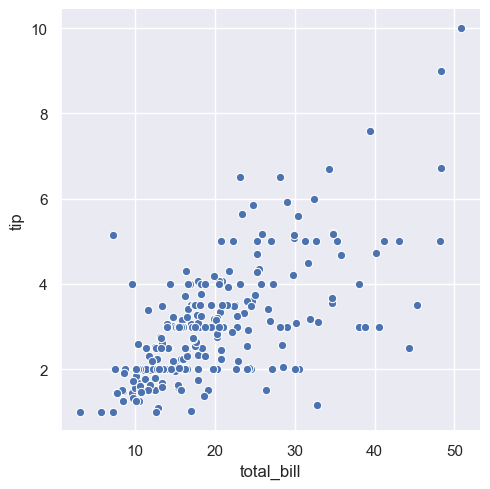

In [4]:
sns.relplot(x = 'total_bill', y = 'tip', color = 'b', data = tips);

> While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

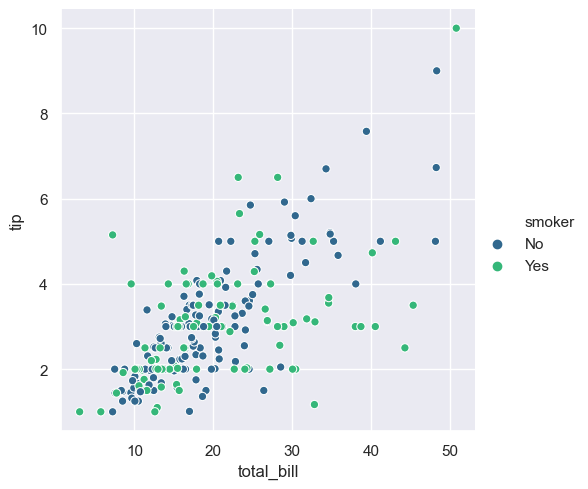

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker",palette = 'viridis', data=tips);

> To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

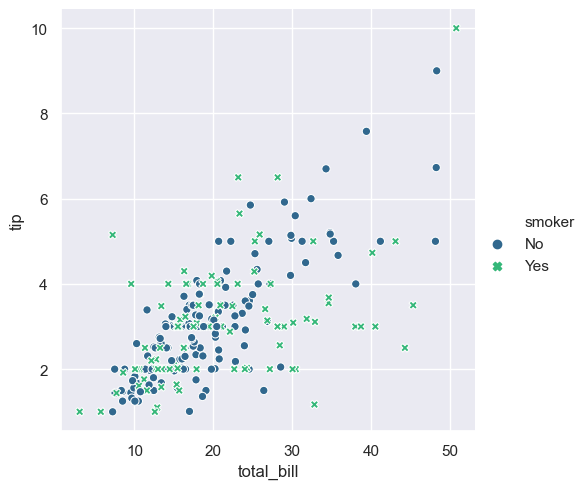

In [7]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips,palette = 'viridis');
# Here we are adding "style" to add different marker. 

> It’s also possible to represent four variables by changing the hue and style of each point independently.

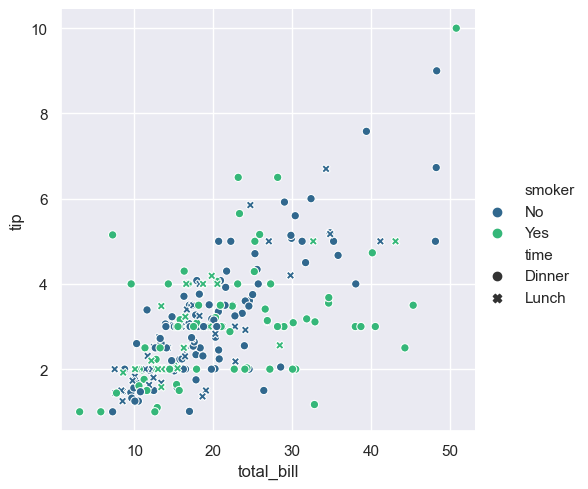

In [8]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips,palette = 'viridis');

> If the hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette:

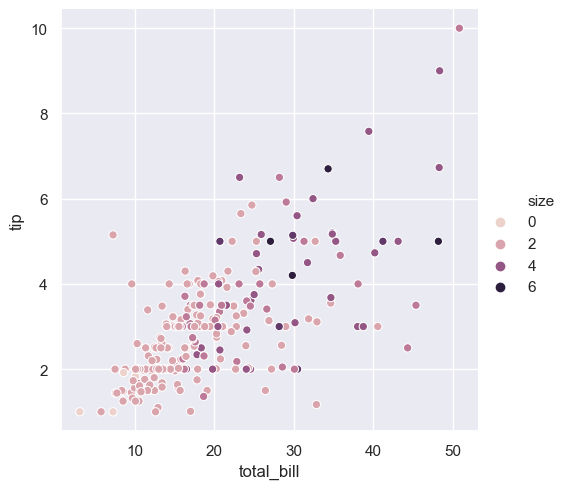

In [10]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'size', data = tips);

> The third kind of semantic variable changes the size of each point:

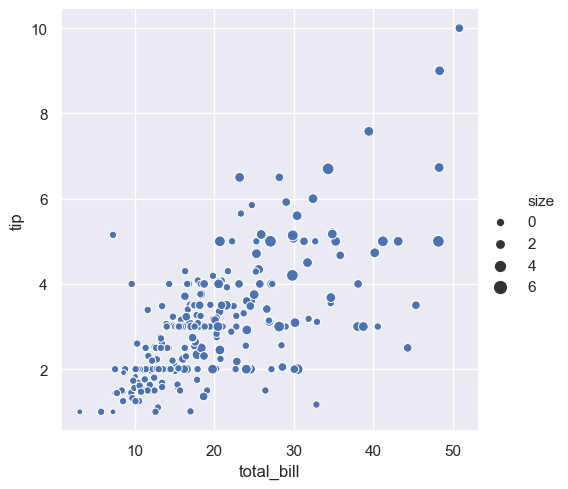

In [11]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

> This range of sizes can be customized:

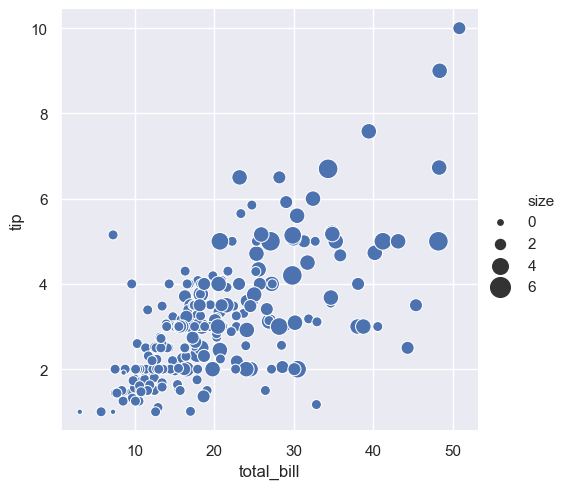

In [13]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

## 2. Line Plots
With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the lineplot() function, either directly or with relplot() by setting kind="line":

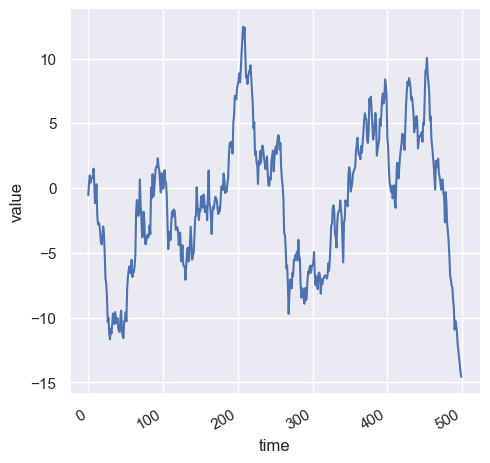

In [16]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))

g = sns.relplot(x="time", y="value", kind="line", data=df)

g.fig.autofmt_xdate()

> Because lineplot() assumes that you are most often trying to draw y as a function of x, the default behavior is to sort the data by the x values before plotting. However, this can be disabled:

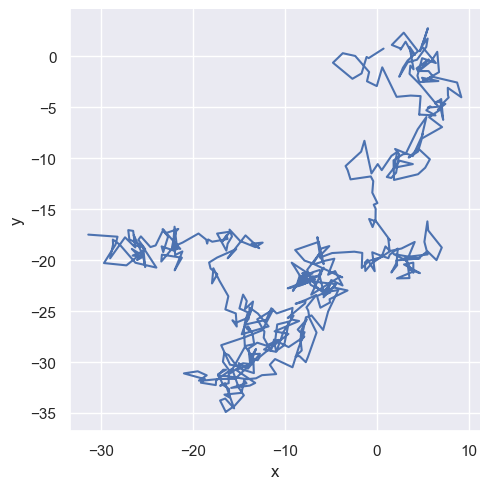

In [17]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

### Aggregation and Representing Uncertainty
More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

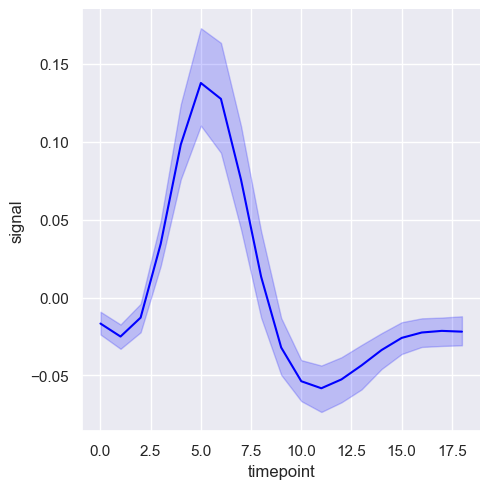

In [19]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, color = 'blue');

> The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them:

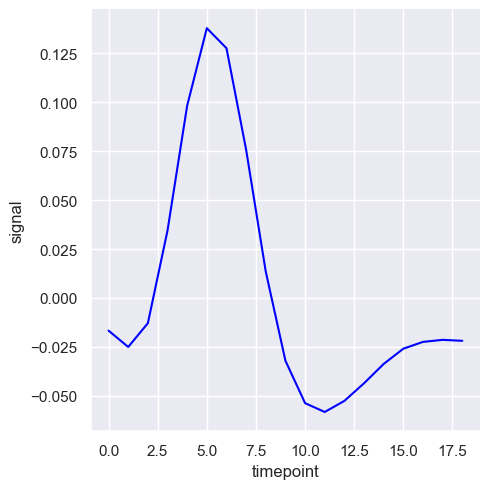

In [20]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line",color='blue', data=fmri);
# CI parameter here is confidence interval.

> Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

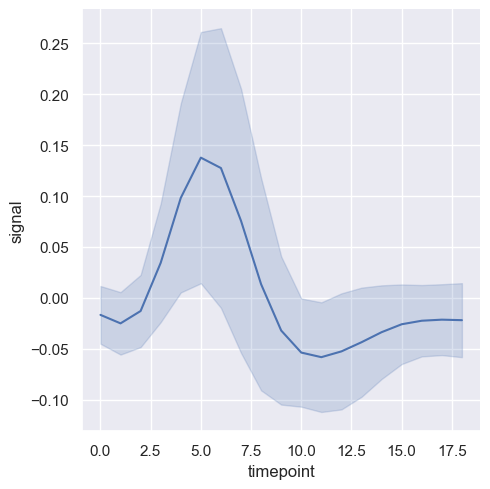

In [21]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

> To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point.

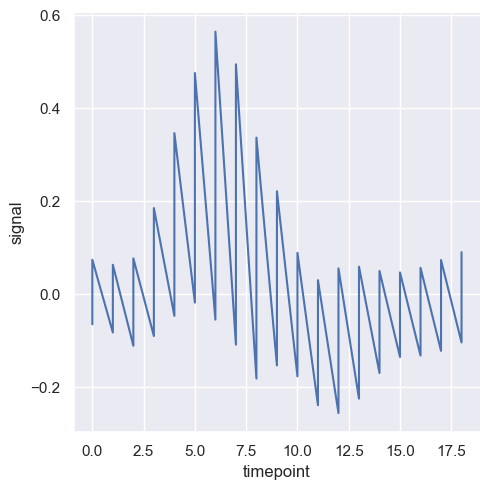

In [22]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

### Plotting Subsets of data with Semantic Mappings
The lineplot() function has the same flexibility as scatterplot(): it can show up to three additional variables by modifying the hue, size, and style of the plot elements.

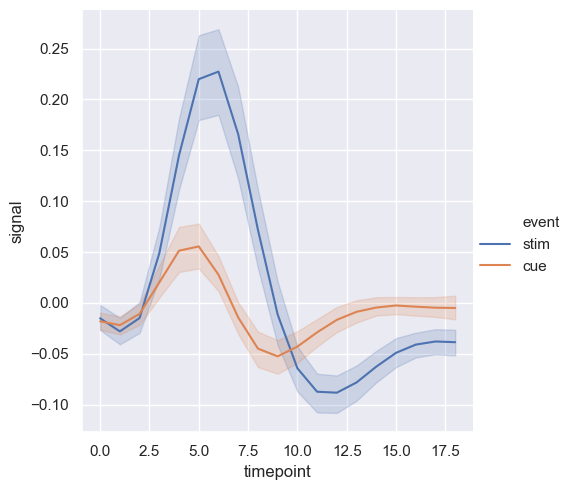

In [23]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

> Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

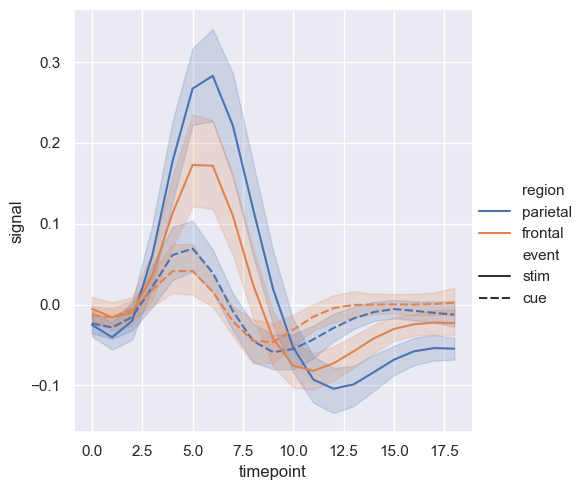

In [24]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

> But you can identify subsets by the markers used at each observation, either together with the dashes or instead of them:

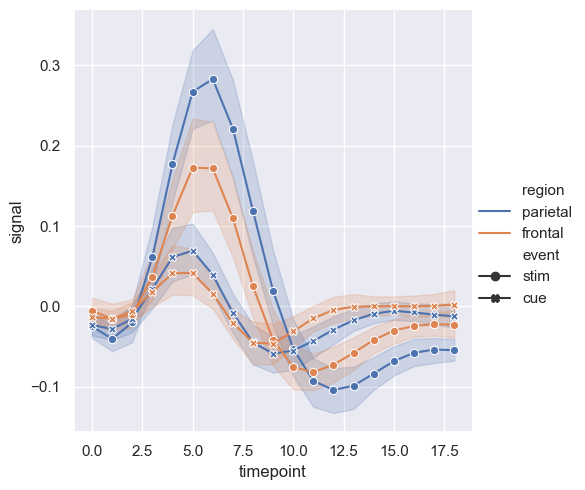

In [25]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

> Even when you are only examining changes across one additional variable, it can be useful to alter both the color and style of the lines. This can make the plot more accessible when printed to black-and-white or viewed by someone with color blindness:

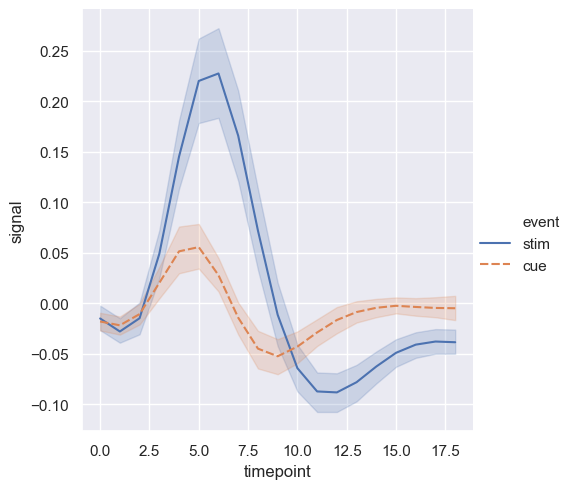

In [26]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            kind="line", data=fmri);

> The default colormap and handling of the legend in lineplot() also depends on whether the hue semantic is categorical or numeric:

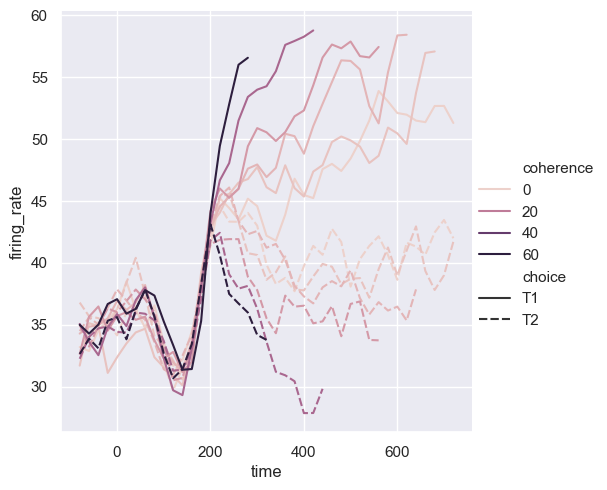

In [31]:
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

> It may happen that, even though the hue variable is numeric, it is poorly represented by a linear color scale. That’s the case here, where the levels of the hue variable are logarithmically scaled. You can provide specific color values for each line by passing a list or dictionary:

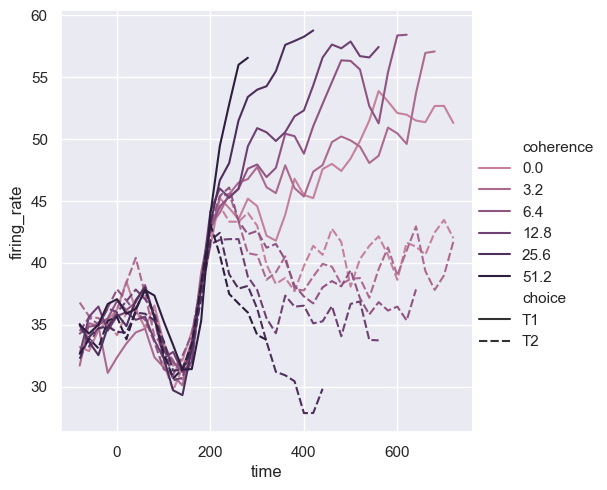

In [32]:
palette = sns.cubehelix_palette(light=0.6, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots);

### Plotting with Date Data
Line plots are often used to visualize data associated with real dates and times. These functions pass the data down in their original format to the underlying matplotlib functions, and so they can take advantage of matplotlib’s ability to format dates in tick labels. But all of that formatting will have to take place at the matplotlib layer, and you should refer to the matplotlib documentation to see how it works:

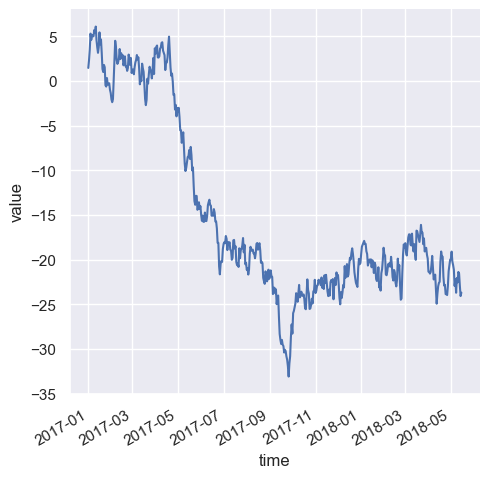

In [33]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

### Facets
This means that you make multiple axes and plot subsets of the data on each of them:

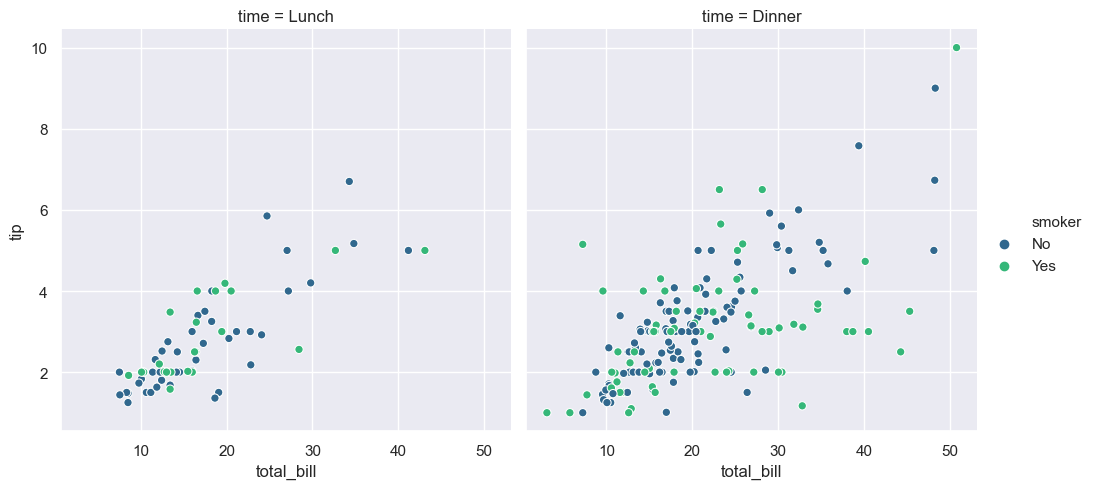

In [34]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips,palette='viridis');

> You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size FacetGrid is parameterized by the height and aspect ratio of each facet:

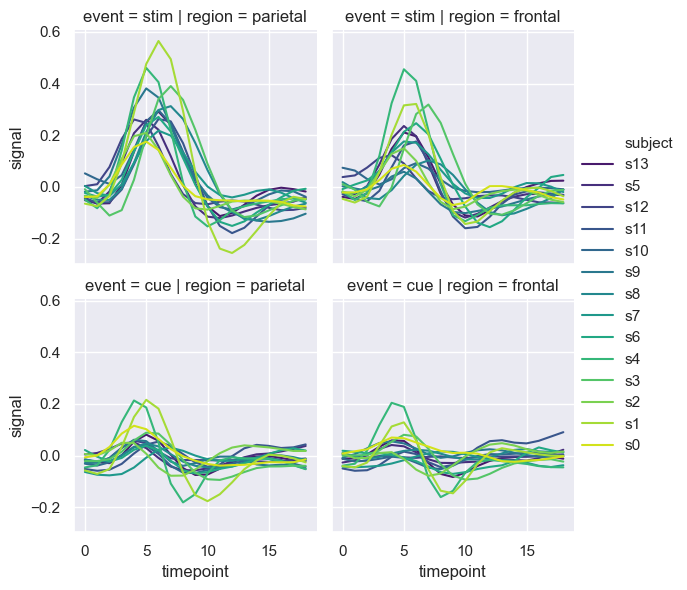

In [35]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event",palette = 'viridis', height=3,
            kind="line", estimator=None, data=fmri);

> When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows:

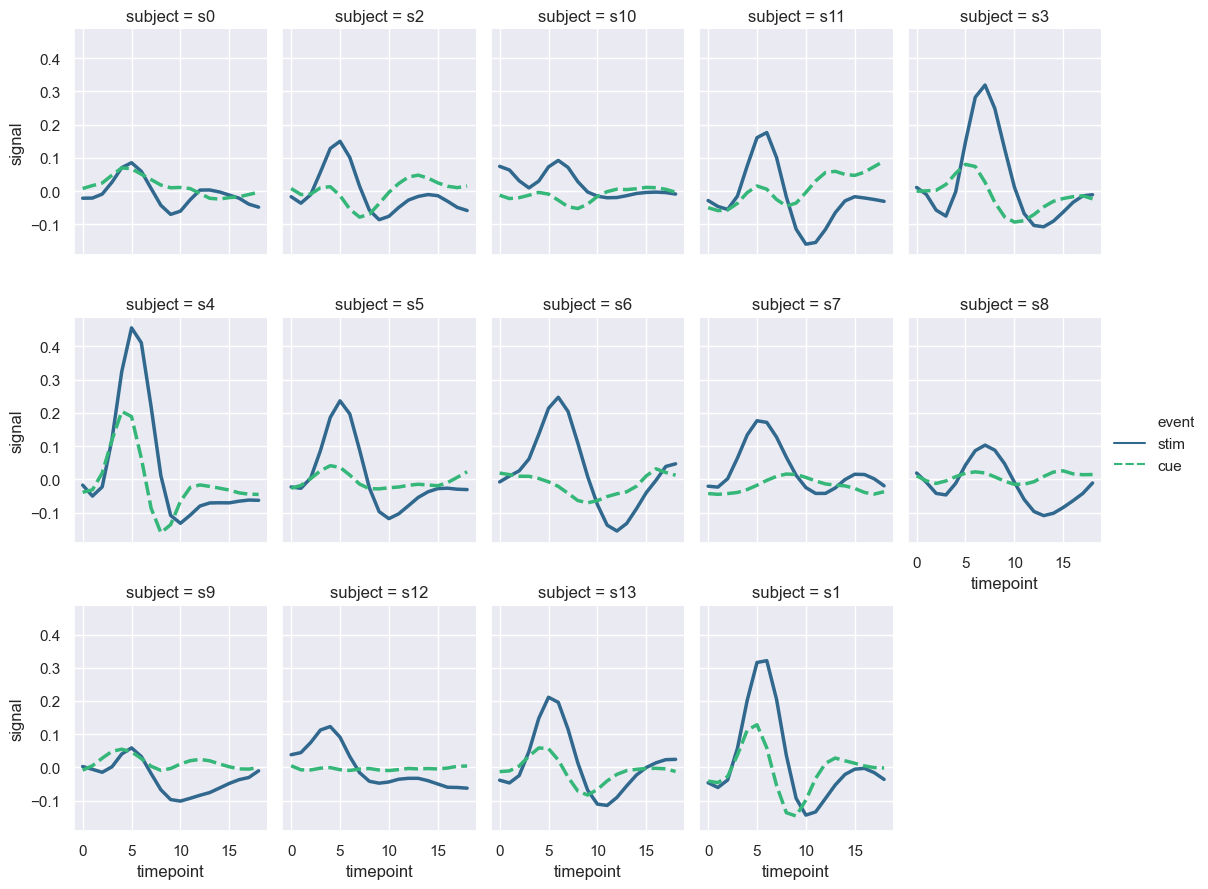

In [36]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,palette = 'viridis',
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));